 <center> <h1> <b> Pattern Recognition and Machine Learning (AI2000) </b> </h1> </center>




 <center> <h2> <b> Neural Networks </b> </h2> </center>

<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [274]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [275]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [276]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [277]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [287]:
##################################################
#Define the architecture
##################################################

def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

def sigmoid(inp):
  outp = 1 / (1 + np.exp(-inp))
  return outp

def tanh(inp):
  outp = np.tanh(inp)
  return outp

def leaky_relu(inp, alpha=0.01):
  outp = np.where(inp > 0, inp, alpha * inp)
  return outp

def gradReLu(inp):
  outp = np.where(inp > 0, 1, 0)
  return outp

def gradSigmoid(inp):
  outp = sigmoid(inp) * (1 - sigmoid(inp))
  return outp

def gradTanh(inp):
  outp = 1 - np.tanh(inp) ** 2
  return outp

def gradLeakyReLu(inp, alpha=0.01):
  outp = np.where(inp > 0, 1, alpha)
  return outp

def softmax(inp):
  exp_inp = np.exp(inp)
  outp = exp_inp / np.sum(exp_inp, axis=1, keepdims=True)
  return outp


def activation(inp, activation_function='relu'):
  if activation_function == 'relu':
    return ReLu(inp)
  elif activation_function == 'sigmoid':
    return sigmoid(inp)
  elif activation_function == 'tanh':
    return tanh(inp)
  elif activation_function == 'leaky_relu':
    return leaky_relu(inp)
  elif activation_function == 'softmax':
    return softmax(inp)
  else:
    raise ValueError("Invalid activation function")

def dropout_forward(inputs, dropout_prob=0.0):
  if dropout_prob > 0.0:
    mask = np.random.choice([0, 1], size=inputs.shape, p=[dropout_prob, 1 - dropout_prob]).astype(np.float32)
    return inputs * mask
  else:
    return inputs

def dropout_backward(inputs, mask, dropout_prob=0.0):
  if dropout_prob > 0.0:
    return inputs * mask
  else:
    return inputs

def fwdPropagate(inputs, weights,activation_function='relu',dropout_prob=0.0,is_training=False,output_function='softmax'):
  W1, W2, W3 = weights
  a1= np.dot(inputs, W1) 
  z1= activation(a1, activation_function)
  mask1=None
  mask2=None
  if is_training and dropout_prob > 0.0:
    mask1 = np.random.choice([0, 1], size=z1.shape, p=[dropout_prob, 1-dropout_prob]) 
    z1=z1 * mask1

  a2= np.dot(z1, W2)
  z2= activation(a2, activation_function) 
  if is_training and dropout_prob > 0.0:
    mask2 = np.random.choice([0, 1], size=z2.shape, p=[dropout_prob, 1-dropout_prob])
    z2=z2 * mask2
  
  a3= np.dot(z2, W3)
  outps= activation(a3, output_function)
  return a1,z1,a2,z2,a3,mask1,mask2,outps

def grad_activation(inp, activation_function='relu'):
  if activation_function == 'relu':
    return gradReLu(inp)
  elif activation_function == 'sigmoid':
    return gradSigmoid(inp)
  elif activation_function == 'tanh':
    return gradTanh(inp)
  elif activation_function == 'leaky_relu':
    return gradLeakyReLu(inp)
  else:
    raise ValueError("Invalid activation function") 

def computeGradients(inputs, targets, weights, activations,activation_function='relu',lamda=0,dropout_prob=0.0):
  W1, W2, W3 = weights
  a1, z1, a2, z2, a3, mask1,mask2,outps = activations
  d3= (outps - targets )
  dj_dw3= np.dot(z2.T, d3) + lamda * W3
  d2= np.dot(d3, W3.T) * grad_activation(a2, activation_function)
  if dropout_prob > 0.0 and mask2 is not None:
    d2 = d2 * mask2
  dj_dw2= np.dot(z1.T, d2) + lamda * W2
  d1= np.dot(d2, W2.T) * grad_activation(a1, activation_function) 
  if dropout_prob > 0.0 and mask1 is not None:
    d1 = d1 * mask1
  dj_dw1= np.dot(inputs.T, d1) + lamda * W1
  return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate):
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 -= learning_rate * dj_dw1 
  W2 -= learning_rate * dj_dw2 
  W3 -= learning_rate * dj_dw3
  return [W1, W2, W3]

def backPropagate(inputs, targets, weights, activations, learning_rate,activation_function='relu',lamda=0,dropout_prob=0.0):
  
  gradients=computeGradients(inputs, targets, weights, activations,activation_function,lamda,dropout_prob=dropout_prob) 
  weights=applyGradients(weights, gradients, learning_rate)
  return weights

def initialize_adam(weights):
  m = [np.zeros_like(w) for w in weights]
  v = [np.zeros_like(w) for w in weights]
  t = 0
  return m, v, t

def adam_optimizer(weights,m,v,t, gradients, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
  for i in range(len(weights)):
    m[i] = beta1 * m[i] + (1 - beta1) * gradients[i]
    v[i] = beta2 * v[i] + (1 - beta2) * (gradients[i] ** 2)
    m_hat = m[i] / (1 - beta1 ** (t + 1))
    v_hat = v[i] / (1 - beta2 ** (t + 1))
    weights[i] -= learning_rate * ((m_hat / (np.sqrt(v_hat) + epsilon)))
  return weights,m,v,t+1

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128,num_hidden_units=512,num_classes=10, epochs=30, train_val_split=0.8, learning_rate=0.001,activation_function='relu',output_function="softmax",optimizer='sgd',lamda=0,early_stopping=False,dropout_prob=0.0):

  hidden_units =num_hidden_units
  n_classes = num_classes
  n_samples = inputs.shape[0]
  n_batches = int(n_samples * train_val_split / batch_size)
  n_train = int(n_samples * train_val_split)
  
  train_index=np.random.choice(n_samples, n_train, replace=False)
  val_index=np.setdiff1d(np.arange(n_samples), train_index)
  train_inputs = inputs[train_index]
  train_targets = targets_idx[train_index]
  val_inputs = inputs[val_index]  
  val_targets = targets_idx[val_index]

  W1=np.random.randn(inputs.shape[1], hidden_units) *0.01
  W2=np.random.randn(hidden_units, hidden_units) *0.01
  W3=np.random.randn(hidden_units, n_classes) *0.01
  train_acc_list = [0] * epochs
  train_err_list = [0] * epochs
  val_acc_list = [0] * epochs
  val_err_list = [0] * epochs
    
  weights = [W1, W2, W3]
  
  if optimizer == 'adam':
    m, v, t = initialize_adam(weights)
    
  #Interate for epochs times
  print("Training the network")
  print("--------------------------------------------------")
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(train_inputs.shape[0])
    train_inputs = train_inputs[shuffled_indices]
    train_targets = train_targets[shuffled_indices]
    
    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start = batch * batch_size
      end = start + batch_size
      inputs = train_inputs[start:end]
      targets = train_targets[start:end]
      
      #Forward propagation
      activations = fwdPropagate(inputs, weights,activation_function,is_training=True,dropout_prob=dropout_prob,output_function=output_function)
  
      #Backward propagation
      if optimizer == 'sgd':
        weights = backPropagate(inputs, targets, weights, activations, learning_rate,activation_function,lamda=lamda,dropout_prob=dropout_prob)
      if optimizer == 'adam':
        gradients = computeGradients(inputs, targets, weights, activations,activation_function,lamda,dropout_prob=dropout_prob)
        weights,m,v,t = adam_optimizer(weights,m,v,t,gradients,learning_rate)  

    #Compute output on training data
    activations = fwdPropagate(train_inputs, weights,activation_function)
    outputs = activations[-1]
    
    l2_penalty = lamda * (np.sum(weights[0]**2) + np.sum(weights[1]**2) + np.sum(weights[2]**2))

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(outputs, axis=1) == np.argmax(train_targets, axis=1))*100
    eps = 1e-12
    outputs = np.clip(outputs, eps, 1. - eps)
    train_error = -np.mean(np.sum(train_targets * np.log(outputs), axis=1))+ l2_penalty

    #Compute outputs on validation data
    val_activations = fwdPropagate(val_inputs, weights,activation_function)
    val_outputs = val_activations[-1]
    
    #Compute validation accuracy, and validation error
    eps = 1e-12
    val_outputs = np.clip(val_outputs, eps, 1. - eps)
    val_error = -np.mean(np.sum(val_targets * np.log(val_outputs), axis=1))+ l2_penalty
    val_accuracy = np.mean(np.argmax(val_outputs, axis=1) == np.argmax(val_targets, axis=1))*100
    
    train_acc_list[epoch] = train_accuracy
    train_err_list[epoch] = train_error
    val_acc_list[epoch] = val_accuracy
    val_err_list[epoch] = val_error

    print(f"Epoch {epoch+1} | Train Accuracy: {train_accuracy:.2f}% | Train Error: {train_error:.4f} | Validation Accuracy: {val_accuracy:.2f}% | Validation Error: {val_error:.4f}")
    if(early_stopping and epoch > 0 and val_err_list[epoch] > val_err_list[epoch-1]):
      print("Early stopping at epoch", epoch+1)
      break
    

  #Save the parameters of network
  return weights,train_acc_list, train_err_list, val_acc_list, val_err_list 


In [ ]:

#Call the training function to train the network

print("\nActivation function: ReLu\n")
weigths_relu,train_acc_relu, train_err_relu, val_acc_relu, val_err_relu =training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='relu')

##################################################
#Evaluate the performance on test data
##################################################

activations_relu = fwdPropagate(x_test, weigths_relu,"relu")
outputs_relu = activations_relu[-1]

test_accuracy_relu = np.mean(np.argmax(outputs_relu, axis=1) == np.argmax(y_test, axis=1))*100
test_error_relu = -np.mean(np.sum(y_test * np.log(outputs_relu), axis=1))
print("Test error:", test_error_relu)
print("Test accuracy:", test_accuracy_relu)






Activation function: ReLu

Training the network
--------------------------------------------------
Epoch 1 | Train Accuracy: 88.35% | Train Error: 0.4038 | Validation Accuracy: 87.52% | Validation Error: 0.4194
Epoch 2 | Train Accuracy: 92.97% | Train Error: 0.2505 | Validation Accuracy: 92.27% | Validation Error: 0.2715
Epoch 3 | Train Accuracy: 94.92% | Train Error: 0.1729 | Validation Accuracy: 94.38% | Validation Error: 0.1955
Epoch 4 | Train Accuracy: 96.21% | Train Error: 0.1313 | Validation Accuracy: 95.62% | Validation Error: 0.1483
Epoch 5 | Train Accuracy: 97.14% | Train Error: 0.1003 | Validation Accuracy: 96.43% | Validation Error: 0.1225
Epoch 6 | Train Accuracy: 97.73% | Train Error: 0.0828 | Validation Accuracy: 96.75% | Validation Error: 0.1105
Epoch 7 | Train Accuracy: 98.06% | Train Error: 0.0692 | Validation Accuracy: 97.23% | Validation Error: 0.0993
Epoch 8 | Train Accuracy: 98.31% | Train Error: 0.0595 | Validation Accuracy: 97.33% | Validation Error: 0.0955
Epoc

<b> Report your observations </b>

1.this neural network when trained using sgd for 30 epochs gives 99.9%~100% training accuracy

2.the test accuracy is coming in the range of 98%~99%. 

3.this neural network explodes for higher value initialization of w.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################

print("\nActivation function: sigmoid\n")
weigths_sigmoid,train_acc_sigmoid, train_err_sigmoid, val_acc_sigmoid, val_err_sigmoid=training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='sigmoid')
print("\nActivation function: tanh\n")
weigths_tanh,train_acc_tanh, train_err_tanh, val_acc_tanh, val_err_tanh=training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='tanh')
print("\nActivation function: leaky_relu\n")
weigths_leaky_relu,train_acc_leaky_relu, train_err_leaky_relu, val_acc_leaky_relu, val_err_leaky_relu=training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='leaky_relu')



##################################################
#Evaluate the performance on MNIST test data
##################################################
activations_sigmoid = fwdPropagate(x_test, weigths_sigmoid,"sigmoid")
outputs_sigmoid = activations_sigmoid[-1]
test_accuracy_sigmoid = np.mean(np.argmax(outputs_sigmoid, axis=1) == np.argmax(y_test, axis=1))*100
test_error_sigmoid = -np.mean(np.sum(y_test * np.log(outputs_sigmoid), axis=1))

activations_tanh = fwdPropagate(x_test, weigths_tanh,"tanh")
outputs_tanh = activations_tanh[-1]
test_accuracy_tanh = np.mean(np.argmax(outputs_tanh, axis=1) == np.argmax(y_test, axis=1))*100
test_error_tanh = -np.mean(np.sum(y_test * np.log(outputs_tanh), axis=1))

activations_leaky_relu = fwdPropagate(x_test, weigths_leaky_relu,"leaky_relu")
outputs_leaky_relu = activations_leaky_relu[-1]
test_accuracy_leaky_relu = np.mean(np.argmax(outputs_leaky_relu, axis=1) == np.argmax(y_test, axis=1))*100
test_error_leaky_relu = -np.mean(np.sum(y_test * np.log(outputs_leaky_relu), axis=1))

print("Activation function: sigmoid")   
print("Test error:", test_error_sigmoid)
print("Test accuracy:", test_accuracy_sigmoid)
print("------------------------------------------------")
print("Activation function: tanh")
print("Test error:", test_error_tanh)
print("Test accuracy:", test_accuracy_tanh)
print("------------------------------------------------")
print("Activation function: leaky_relu")
print("Test error:", test_error_leaky_relu)
print("Test accuracy:", test_accuracy_leaky_relu)
print("------------------------------------------------")
print("Activation function: ReLu")
print("Test error:", test_error_relu)
print("Test accuracy:", test_accuracy_relu)










Activation function: sigmoid

Training the network
--------------------------------------------------
Epoch 1 | Train Accuracy: 9.07% | Train Error: 2.3274 | Validation Accuracy: 8.75% | Validation Error: 2.3311
Epoch 2 | Train Accuracy: 10.11% | Train Error: 2.2986 | Validation Accuracy: 9.27% | Validation Error: 2.2983
Epoch 3 | Train Accuracy: 27.37% | Train Error: 1.9400 | Validation Accuracy: 27.50% | Validation Error: 1.9439
Epoch 4 | Train Accuracy: 57.22% | Train Error: 1.2018 | Validation Accuracy: 56.60% | Validation Error: 1.2068
Epoch 5 | Train Accuracy: 72.05% | Train Error: 0.7983 | Validation Accuracy: 72.23% | Validation Error: 0.7999
Epoch 6 | Train Accuracy: 77.04% | Train Error: 0.7071 | Validation Accuracy: 77.15% | Validation Error: 0.7163
Epoch 7 | Train Accuracy: 82.64% | Train Error: 0.5790 | Validation Accuracy: 82.60% | Validation Error: 0.5924
Epoch 8 | Train Accuracy: 85.22% | Train Error: 0.5111 | Validation Accuracy: 84.60% | Validation Error: 0.5290
Epoc

<b> Report your observations </b>

1. training accuracies for sigmoid,tanh,leaky relu after 30 epochs are $94\% \sim 95\%$,$99\%\sim 99.5\%$,$99.9\%\sim 100\%$ respectively

2. test accuracies for sigmoid,tanh,leaky relu are $93\%\sim 95\%$,$97\%\sim 98\%$,$98\%\sim 99\%$ respectively

3. leaky relu gives the maximum accuracy in most cases but sometimes relu gives more.this also happen due to different initialization of weights.least accuracy is given by sigmoid.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################
print("\nAdam Optimiser + Leaky ReLu\n")
weight_lrelu_adam,train_acc_lrelu_adam, train_err_lrelu_adam, val_acc_lrelu_adam, val_err_lrelu_adam =training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='leaky_relu',optimizer='adam')


##################################################
#Compare the accuracies and report your observations
##################################################

Activations_adam = fwdPropagate(x_test, weight_lrelu_adam,"leaky_relu")
outputs_adam = Activations_adam[-1]

test_accuracy_adam = np.mean(np.argmax(outputs_adam, axis=1) == np.argmax(y_test, axis=1))*100
test_error_adam = -np.mean(np.sum(y_test * np.log(outputs_adam), axis=1))

print("leaky_relu + Adam Optimiser")
print("Test error:", test_error_adam)
print("Test accuracy:", test_accuracy_adam)
print("------------------------------------------------")
print("leaky_relu + SGD Optimiser")
print("Test error:", test_error_leaky_relu)
print("Test accuracy:", test_accuracy_leaky_relu)





Adam Optimiser + Leaky ReLu

Training the network
--------------------------------------------------
Epoch 1 | Train Accuracy: 96.06% | Train Error: 0.1327 | Validation Accuracy: 95.12% | Validation Error: 0.1628
Epoch 2 | Train Accuracy: 97.86% | Train Error: 0.0726 | Validation Accuracy: 96.62% | Validation Error: 0.1144
Epoch 3 | Train Accuracy: 98.66% | Train Error: 0.0438 | Validation Accuracy: 97.20% | Validation Error: 0.0919
Epoch 4 | Train Accuracy: 98.95% | Train Error: 0.0338 | Validation Accuracy: 97.57% | Validation Error: 0.0828
Epoch 5 | Train Accuracy: 99.28% | Train Error: 0.0244 | Validation Accuracy: 97.58% | Validation Error: 0.0807
Epoch 6 | Train Accuracy: 99.24% | Train Error: 0.0230 | Validation Accuracy: 97.45% | Validation Error: 0.0880
Epoch 7 | Train Accuracy: 99.44% | Train Error: 0.0180 | Validation Accuracy: 97.87% | Validation Error: 0.0850
Epoch 8 | Train Accuracy: 99.16% | Train Error: 0.0242 | Validation Accuracy: 97.45% | Validation Error: 0.0979
Ep

<b> Report your observations </b>

1. adam optimiser converges to 99.5% training accuracy in only 10 epochs where as sgd takes 20 epochs.

2. the test accuracy for adam optimiser+leaky relu gives an accuracy of 97%~99% which is similaar to that of Sgd+relu

3. adam is less sensitive to the choice of learning rate compared to SGD. 



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [295]:
##################################################
#Training with weight regularization
##################################################
l=0.01
print("\nTraining with weight regularization\n")
weights_leaky_relu_reg,train_acc_leaky_relu_reg, train_err_leaky_relu_reg, val_acc_leaky_relu_reg, val_err_leaky_relu_reg =training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='leaky_relu',lamda=l)

activations_leaky_relu_reg = fwdPropagate(x_test, weights_leaky_relu_reg,"leaky_relu")
outputs_leaky_relu_reg = activations_leaky_relu_reg[-1]

test_accuracy_leaky_relu_reg = np.mean(np.argmax(outputs_leaky_relu_reg, axis=1) == np.argmax(y_test, axis=1))*100
test_error_leaky_relu_reg = -np.mean(np.sum(y_test * np.log(outputs_leaky_relu_reg), axis=1))+l*(np.sum(weights_leaky_relu_reg[0]**2) + np.sum(weights_leaky_relu_reg[1]**2) + np.sum(weights_leaky_relu_reg[2]**2))
print("Test error:", test_error_leaky_relu_reg)
print("Test accuracy:", test_accuracy_leaky_relu_reg)
print("------------------------------------------------")



##################################################
#Training with dropout strategy
##################################################

p=0.2
print("\nTraining with dropout strategy\n")
weights_leaky_relu_dropout,train_acc_leaky_relu_dropout, train_err_leaky_relu_dropout, val_acc_leaky_relu_dropout, val_err_leaky_relu_dropout =training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='leaky_relu',dropout_prob=p)
activations_leaky_relu_dropout = fwdPropagate(x_test, weights_leaky_relu_dropout,"leaky_relu")
outputs_leaky_relu_dropout = activations_leaky_relu_dropout[-1]
test_accuracy_leaky_relu_dropout = np.mean(np.argmax(outputs_leaky_relu_dropout, axis=1) == np.argmax(y_test, axis=1))*100
test_error_leaky_relu_dropout = -np.mean(np.sum(y_test * np.log(outputs_leaky_relu_dropout), axis=1))
print("Test error:", test_error_leaky_relu_dropout)
print("Test accuracy:", test_accuracy_leaky_relu_dropout)
print("------------------------------------------------")




##################################################
#Training with early stopping criterion
##################################################
print("\nTraining with early stopping criterion\n")
weights_leaky_relu_early,train_acc_leaky_relu_early, train_err_leaky_relu_early, val_acc_leaky_relu_early, val_err_leaky_relu_early =training(x_train,y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,activation_function='leaky_relu',early_stopping=True)
activations_leaky_relu_early = fwdPropagate(x_test, weights_leaky_relu_early,"leaky_relu")
outputs_leaky_relu_early = activations_leaky_relu_early[-1]
test_accuracy_leaky_relu_early = np.mean(np.argmax(outputs_leaky_relu_early, axis=1) == np.argmax(y_test, axis=1))*100
test_error_leaky_relu_early = -np.mean(np.sum(y_test * np.log(outputs_leaky_relu_early), axis=1))
print("Test error:", test_error_leaky_relu_early)
print("Test accuracy:", test_accuracy_leaky_relu_early)
print("------------------------------------------------")









Training with weight regularization

Training the network
--------------------------------------------------
Epoch 1 | Train Accuracy: 88.89% | Train Error: 1.5358 | Validation Accuracy: 88.67% | Validation Error: 1.5312
Epoch 2 | Train Accuracy: 93.00% | Train Error: 1.6102 | Validation Accuracy: 92.85% | Validation Error: 1.6089
Epoch 3 | Train Accuracy: 95.27% | Train Error: 1.7282 | Validation Accuracy: 95.15% | Validation Error: 1.7364
Epoch 4 | Train Accuracy: 96.12% | Train Error: 1.8658 | Validation Accuracy: 95.65% | Validation Error: 1.8795
Epoch 5 | Train Accuracy: 96.84% | Train Error: 1.9839 | Validation Accuracy: 95.97% | Validation Error: 2.0069
Epoch 6 | Train Accuracy: 97.32% | Train Error: 2.0949 | Validation Accuracy: 96.63% | Validation Error: 2.1158
Epoch 7 | Train Accuracy: 98.14% | Train Error: 2.1880 | Validation Accuracy: 97.22% | Validation Error: 2.2128
Epoch 8 | Train Accuracy: 98.33% | Train Error: 2.2922 | Validation Accuracy: 97.20% | Validation Error: 2

<b> Report your observations </b>

1. when regularization is added to the loss function, the training accuracy is reduced to 98%~99% and test accuracy is reduced to 97%~98%.Since my training data is not overfitting, regularization is improving the performance of the network.

2. when dropout is added to the network, the training accuracy is reduced to 98%~99% and test accuracy is reduced to 97%~98%.algthough dropout is a regularization technique, it is not improving the performance of the network in this case as the training data is not overfitting. 

3. when early stopping is added to the network, the training accuracy is reduced to 98%~99% and test accuracy is reduced to 97%~98%.Early stopping happens when the validation error increases.since my model already reaches atleast 95% accuracy in 7-9 epochs,checking for more than 1 increase in validation error doesn't stop the traing in 30 epochs.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



In [ ]:
def Logistic_Regression(X_train, Y_train, X_test, max_iter=1000, threshold=1e-4):
    
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    w = np.zeros(X_train.shape[1])
    
    for iter in range(max_iter):
        preds = sigmoid(np.dot(X_train, w))
        error = preds - Y_train
        gradient = np.dot(X_train.T, error)
        R = np.diag(preds * (1 - preds)) 
        Hessian = np.dot(X_train.T, np.dot(R, X_train))
        w_update = np.linalg.solve(Hessian, gradient)
        w -= w_update
        if np.linalg.norm(w_update) < threshold:
            print(f"Converged after {iter + 1} iterations.")
            break
    
    preds_test = sigmoid(np.dot(X_test, w))
    pred_labels = (preds_test > 0.5).astype(int)  
    
    return pred_labels, w

def binary_cross_entropy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.clip(np.array(y_pred), 1e-9, 1-1e-9) 
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def one_hot_encode(labels, num_classes=2):
    labels=np.array(labels).astype(int)
    return np.eye(num_classes)[labels]

def plot_decision_boundary(test_data, test_targets, predictions, w):
   
    plt.figure(figsize=(8, 6))
    plt.title('Predictions on Testing Data')
    plt.scatter(test_data[test_targets == 0][:, 0], test_data[test_targets == 0][:, 1], color='blue', label='Class 1 (Correct)')
    plt.scatter(test_data[test_targets == 1][:, 0], test_data[test_targets == 1][:, 1],color='green', label='Class 2 (Correct)')
    plt.scatter(test_data[test_targets != predictions][:, 0], test_data[test_targets != predictions][:, 1], color='red', label='Misclassified')
    x_values = np.linspace(test_data[:, 0].min(), test_data[:, 0].max(), 100)
    y_values = -(w[0] + w[1] * x_values) / w[2]
    plt.plot(x_values, y_values, color='black', label='Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()


def fwdPropagate_5(X, W1, b1, W2, b2, W3, b3):
    Z1 = X @ W1.T + b1
    A1 = ReLu(Z1)
    Z2 = A1 @ W2.T + b2
    A2 = ReLu(Z2)
    Z3 = A2 @ W3.T + b3
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def computeGradients_5(X, Y, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = fwdPropagate_5(X, W1, b1, W2, b2, W3, b3)
    m = X.shape[0]
    dZ3 = A3-Y
    dW3 = (dZ3.T@A2)/m
    db3 = np.mean(dZ3, axis=0, keepdims=True)
    dA2 = dZ3@W3
    dZ2 = dA2*gradReLu(Z2)
    dW2 = (dZ2.T@A1)/m
    db2 = np.mean(dZ2, axis=0, keepdims=True)
    dA1 = dZ2@W2
    dZ1 = dA1*gradReLu(Z1)
    dW1 = (dZ1.T@X)/m
    db1 = np.mean(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

def training_5(X, Y, hidden_units=10, epochs=100, lr=0.05):
    input_dim = X.shape[1]
    W1 = np.random.randn(hidden_units, input_dim) * 0.1
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, hidden_units) * 0.1
    b2 = np.zeros((1, hidden_units))
    W3 = np.random.randn(1, hidden_units) * 0.1
    b3 = np.zeros((1, 1))

    for epoch in range(epochs):
        dW1, db1_g, dW2, db2_g, dW3, db3_g = computeGradients_5(X, Y, W1, b1, W2, b2, W3, b3)
        W1 -= lr * dW1
        b1 -= lr * db1_g
        W2 -= lr * dW2
        b2 -= lr * db2_g
        W3 -= lr * dW3
        b3 -= lr * db3_g
        A3 = fwdPropagate_5(X, W1, b1, W2, b2, W3, b3)[-1]
        predictions = (A3 > 0.5).astype(int)
        acc = np.mean(predictions == Y) * 100
        err= binary_cross_entropy(Y, A3)
        print(f"Epoch {epoch+1} | Train Accuracy: {acc:.2f}% | Train Error: {err:.4f}")
    

    return W1, b1, W2, b2, W3, b3



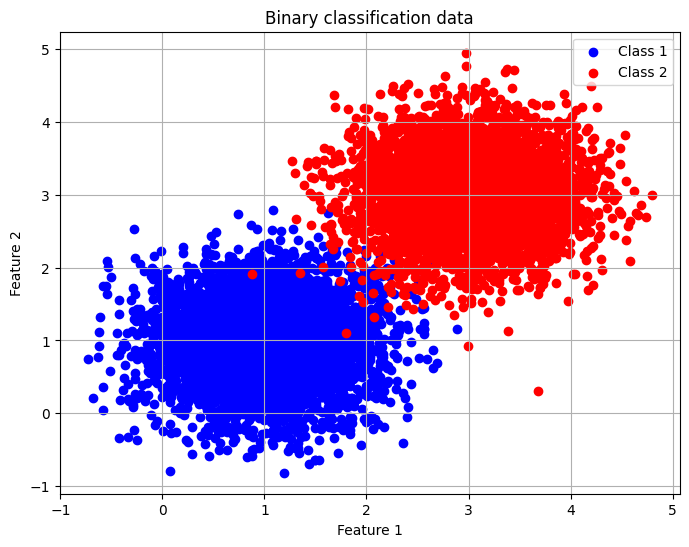

training data (9000, 2)
training labels (9000,)


In [397]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))]).flatten()

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

print("training data",tr_data.shape)
print("training labels",np.array(tr_targets).shape)


Logistic Regression
Converged after 11 iterations.
Test accuracy: 99.5


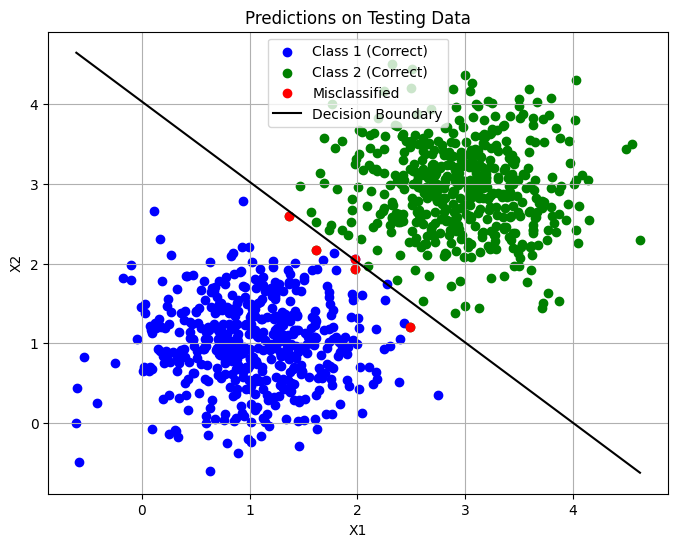

Deep Neural Network
Epoch 1 | Train Accuracy: 56.57% | Train Error: 0.6930
Epoch 2 | Train Accuracy: 56.92% | Train Error: 0.6930
Epoch 3 | Train Accuracy: 57.23% | Train Error: 0.6930
Epoch 4 | Train Accuracy: 57.54% | Train Error: 0.6930
Epoch 5 | Train Accuracy: 57.94% | Train Error: 0.6930
Epoch 6 | Train Accuracy: 58.49% | Train Error: 0.6930
Epoch 7 | Train Accuracy: 58.99% | Train Error: 0.6930
Epoch 8 | Train Accuracy: 59.40% | Train Error: 0.6930
Epoch 9 | Train Accuracy: 60.11% | Train Error: 0.6930
Epoch 10 | Train Accuracy: 60.73% | Train Error: 0.6930
Epoch 11 | Train Accuracy: 61.53% | Train Error: 0.6930
Epoch 12 | Train Accuracy: 62.29% | Train Error: 0.6930
Epoch 13 | Train Accuracy: 63.09% | Train Error: 0.6930
Epoch 14 | Train Accuracy: 63.84% | Train Error: 0.6930
Epoch 15 | Train Accuracy: 64.66% | Train Error: 0.6930
Epoch 16 | Train Accuracy: 65.40% | Train Error: 0.6930
Epoch 17 | Train Accuracy: 66.10% | Train Error: 0.6930
Epoch 18 | Train Accuracy: 66.86% | T

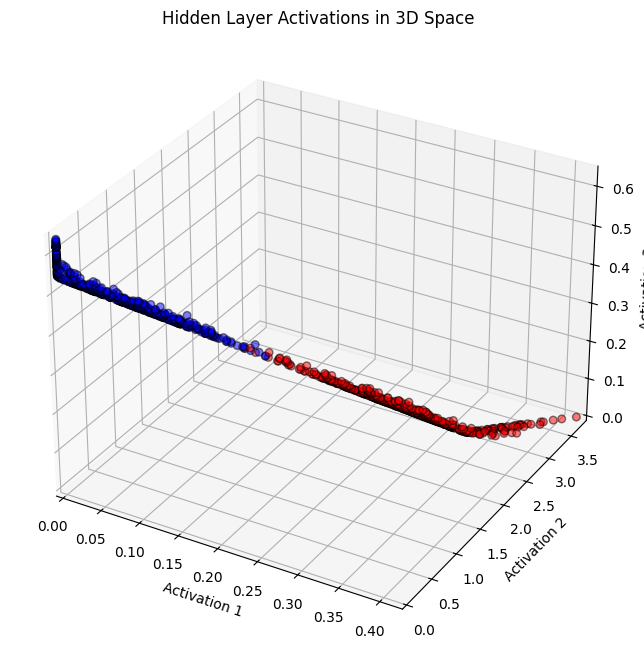

Test accuracy: 95.3


In [401]:

##################################################
#Classify the linearly separable data using linear classification models
##################################################
print("Logistic Regression")
pred_labels,weights = Logistic_Regression(tr_data, tr_targets, te_data)
Accuracy = np.mean(np.array(pred_labels) == te_targets)*100
print("Test accuracy:", Accuracy)   

plot_decision_boundary(te_data, te_targets,pred_labels, weights)


##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

print("Deep Neural Network")
w1, b1, w2, b2, w3, b3 = training_5(tr_data, tr_targets.reshape(-1, 1), hidden_units=3, epochs=400, lr=0.05)
activations_5 = fwdPropagate_5(te_data, w1, b1, w2, b2, w3, b3)
outputs_5 = activations_5[-1]
z2 = activations_5[3]
pred_labels_5 = (outputs_5 > 0.5).astype(int)
pred_labels_5 = pred_labels_5.flatten()
  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Hidden Layer Activations in 3D Space")
colors=["red" if label==1 else "blue" for label in te_targets]
ax.scatter(z2[:, 0],z2[:, 1],z2[:, 2],c=colors,alpha=0.5,s=30,edgecolors='k')
ax.set_xlim([z2[:, 0].min(), z2[:, 0].max()])
ax.set_ylim([z2[:, 1].min(), z2[:, 1].max()])
ax.set_zlim([z2[:, 2].min(), z2[:, 2].max()])
ax.set_title("Hidden Layer Activations in 3D Space")
ax.set_xlabel("Activation 1")
ax.set_ylabel("Activation 2")
ax.set_zlabel("Activation 3")
plt.show()

test_accuracy_5= np.mean(pred_labels_5 == te_targets) * 100
print("Test accuracy:", test_accuracy_5)









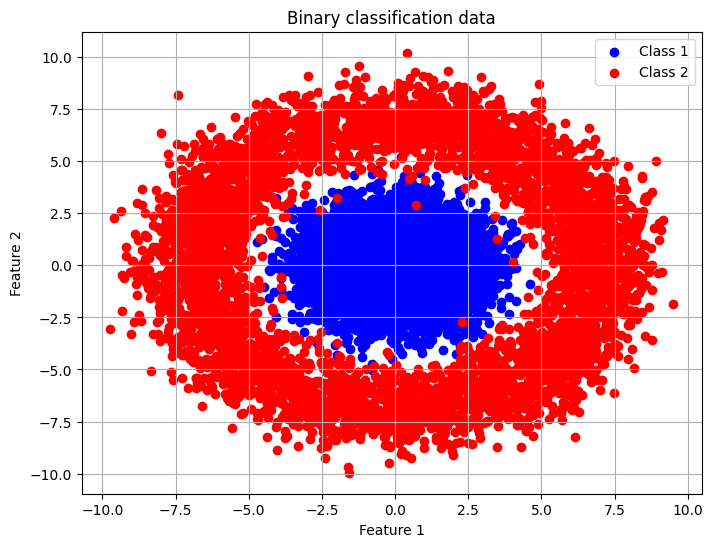

In [402]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 5000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

#Use 90% of data for training and 10 % for testing.
class1_tr = class1_data[:int(0.9*n_samples)]
class2_tr = class2_data[:int(0.9*n_samples)]
class1_te = class1_data[int(0.9*n_samples):]
class2_te = class2_data[int(0.9*n_samples):]
tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])
te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))]).flatten()


Logistic Regression
Converged after 2 iterations.
Test accuracy: 50.8


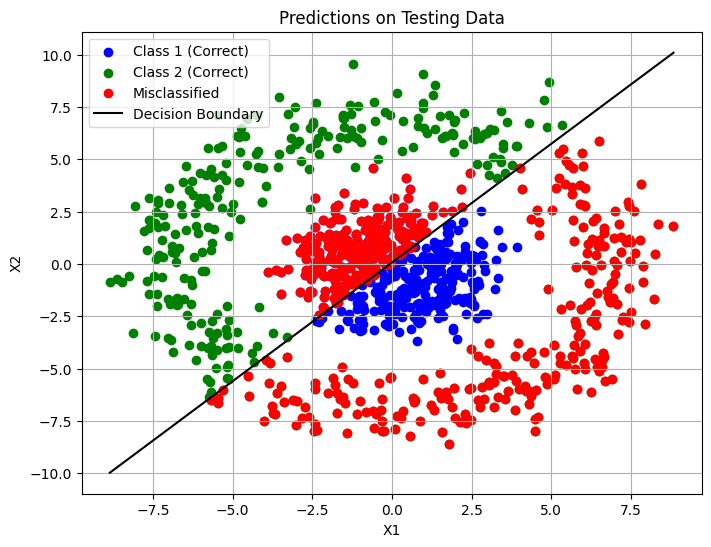

Deep Neural Network
Epoch 1 | Train Accuracy: 51.57% | Train Error: 0.6918
Epoch 2 | Train Accuracy: 53.97% | Train Error: 0.6918
Epoch 3 | Train Accuracy: 56.83% | Train Error: 0.6918
Epoch 4 | Train Accuracy: 59.58% | Train Error: 0.6918
Epoch 5 | Train Accuracy: 61.93% | Train Error: 0.6917
Epoch 6 | Train Accuracy: 63.84% | Train Error: 0.6917
Epoch 7 | Train Accuracy: 64.90% | Train Error: 0.6917
Epoch 8 | Train Accuracy: 65.54% | Train Error: 0.6917
Epoch 9 | Train Accuracy: 65.86% | Train Error: 0.6916
Epoch 10 | Train Accuracy: 66.04% | Train Error: 0.6916
Epoch 11 | Train Accuracy: 66.07% | Train Error: 0.6916
Epoch 12 | Train Accuracy: 65.99% | Train Error: 0.6916
Epoch 13 | Train Accuracy: 65.93% | Train Error: 0.6915
Epoch 14 | Train Accuracy: 65.72% | Train Error: 0.6915
Epoch 15 | Train Accuracy: 65.56% | Train Error: 0.6915
Epoch 16 | Train Accuracy: 65.34% | Train Error: 0.6915
Epoch 17 | Train Accuracy: 65.17% | Train Error: 0.6914
Epoch 18 | Train Accuracy: 64.97% | T

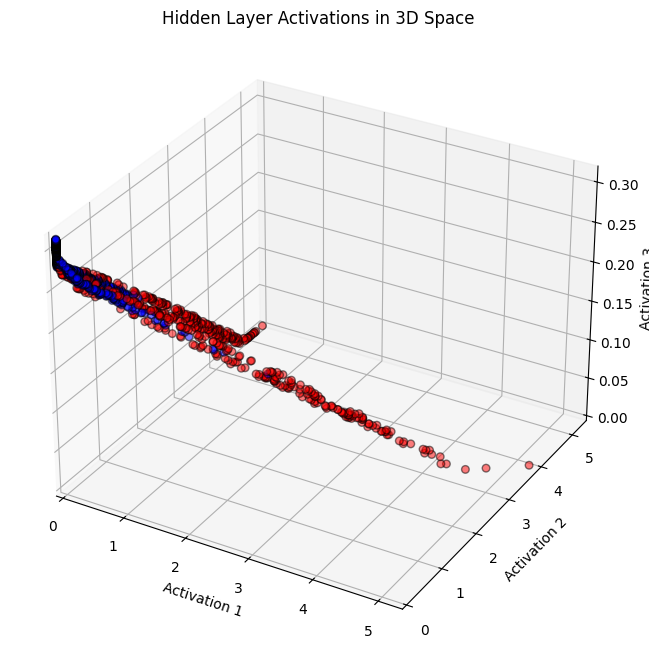

Test accuracy: 83.0


In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
print("Logistic Regression")
pred_labels,weights = Logistic_Regression(tr_data, tr_targets, te_data)
Accuracy = np.mean(np.array(pred_labels) == te_targets)*100
print("Test accuracy:", Accuracy)   
plot_decision_boundary(te_data, te_targets,pred_labels, weights)

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

print("Deep Neural Network")

w1, b1, w2, b2, w3, b3 = training_5(tr_data, tr_targets.reshape(-1, 1), hidden_units=3, epochs=600, lr=0.05)
activations_5 = fwdPropagate_5(te_data, w1, b1, w2, b2, w3, b3)
outputs_5 = activations_5[-1]
z2 = activations_5[3]
pred_labels_5 = (outputs_5 > 0.5).astype(int)
pred_labels_5 = pred_labels_5.flatten()
  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Hidden Layer Activations in 3D Space")
colors=["red" if label==1 else "blue" for label in te_targets]
ax.scatter(z2[:, 0],z2[:, 1],z2[:, 2],c=colors,alpha=0.5,s=30,edgecolors='k')
ax.set_xlim([z2[:, 0].min(), z2[:, 0].max()])
ax.set_ylim([z2[:, 1].min(), z2[:, 1].max()])
ax.set_zlim([z2[:, 2].min(), z2[:, 2].max()])
ax.set_title("Hidden Layer Activations in 3D Space")
ax.set_xlabel("Activation 1")
ax.set_ylabel("Activation 2")
ax.set_zlabel("Activation 3")
plt.show()

test_accuracy_5= np.mean(pred_labels_5 == te_targets) * 100
print("Test accuracy:", test_accuracy_5)












<b> Report your observations </b>

1.in lineearly separable data, the logistic regression model gives 98%-99% test accuracy. The neural network gives a good testing accuracy.

2.in non-linearly separable data, the logistic regression model gives 45%-55% test accuracy. The neural network gives an fluctuating accuracy from 60% to 90% depending on the initialization of weights.

3.this shows that neural network works well for both linearly and non-linearly separable data. but logistic regression works well only for linearly separable data.

4.the neural network is able to learn non-linear decision boundaries with relu activation function and sigmoid output layer only when biases are added to neural network. without biases, the neural network gives an accuracy of 45%-55% for both linearly and non-linearly separable data.

5.increasing number of nodes from 3 to 10 in hidden layer gives a higher accuracy of 80%-90% for both linearly and non-linearly separable data.